# 分類問題のデータ不均衡を解消するSMOTE（Python版） － その1：SMOTEの基礎と imbalanced-learn の使い方 －

url: https://www.salesanalytics.co.jp/datascience/datascience210/

    データサイエンスの世界では、正確な分析と予測が成功の鍵となります。

    しかし、多くの実際のデータセットは不均衡であり、これが特に分類問題において大きな課題となることがあります。

    今回は、データ不均衡問題を解消するための強力なテクニックであるSMOTE（Synthetic Minority Over-sampling Technique）とそのバリエーションについて紹介するとともに、Pythonのコード例を示します。

    実際のビジネスや医療、金融などの分野で直面するデータの不均衡を克服し、より公正で正確な分析の一助となればと思います。

    SMOTE（Synthetic Minority Over-sampling Technique）そのものに関しては、以下の記事を参考にして頂ければと思います。

    url: https://www.salesanalytics.co.jp/column/no00369/

    とは言え、最初に簡単にSMOTE（Synthetic Minority Over-sampling Technique）そのものに関し、お話しいたします。

## はじめに
### 分類問題におけるデータ不均衡の課題
    データサイエンスの世界では、分類問題は最も一般的な課題の一つです。ここでの主な目的は、与えられたデータポイントを特定のカテゴリに分類すること。
    しかし、実際のデータセットではしばしば「データ不均衡」という問題に直面します。
    これは、あるクラスのデータが他のクラスに比べて大幅に少ない場合に発生します。例えば、疾病の診断、金融詐欺の検出、製品の品質管理など、多くの分野で見られます。

    このデータ不均衡は、分類モデルの性能に大きな影響を及ぼします。
    特に、少数派クラスの識別が困難になり、多数派クラスに対するモデルの偏りが生じることがあります。
    これにより、重要な少数派クラスの予測が見落とされ、ビジネスや医療などの重要な意思決定において誤った結論を導くリスクがあります。

## データ不均衡の定義と例
    データ不均衡は、あるクラスのサンプル数が他のクラスに比べて著しく少ない状況を指します。
    これは、特にバイナリ（二値）分類問題で一般的ですが、マルチクラス分類問題でも発生します。
    例えば、クレジットカードの不正使用検出では、不正使用の事例（少数派クラス）は正常な取引（多数派クラス）に比べて非常に稀です。
    このような状況では、モデルが少数派クラスのパターンを学習するのが困難になります。

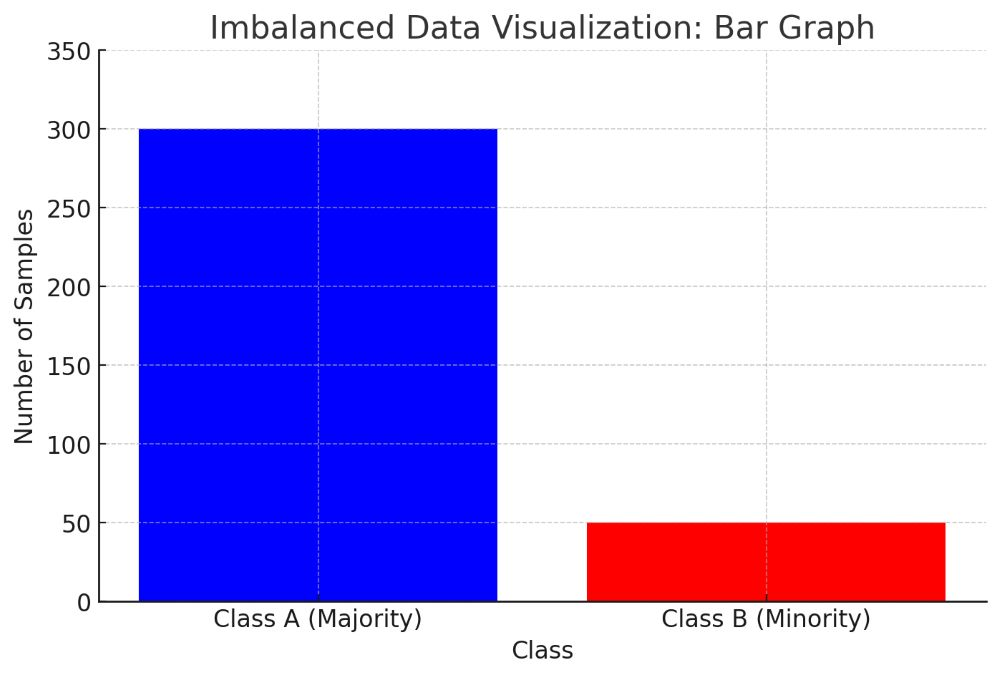

    データ不均衡が分類モデルの性能に与える影響は大きく、主に以下のような問題が生じます。

    1.多数派クラスへの偏り: モデルは多数派クラスの特徴をより多く学習し、少数派クラスを過小評価する傾向があります。
    これは、モデルが単に多数派クラスのサンプルを正しく分類するだけで高い精度を達成できるためです。

    2.少数派クラスの誤分類: 少数派クラスのサンプルが不足しているため、モデルはこれらのサンプルの特徴を十分に捉えられず、
    結果として少数派クラスのサンプルを誤って多数派クラスと分類することがあります。

    3.モデル評価の困難: データ不均衡の存在下では、伝統的な性能指標（例えば精度）はモデルの性能を正確に反映しません。
    少数派クラスの誤分類が全体の精度に与える影響が小さいため、誤った結論を導く可能性があります。

## SMOTEとPythonライブラリ
    この問題に対処するために、SMOTE（Synthetic Minority Over-sampling Technique）という技術が考案されました。
    SMOTEは、少数派クラスのデータを合成的に増やすことでデータ不均衡を解消する手法です。
    この手法では、既存の少数派クラスのサンプルから新しいサンプルを合成し、クラス間のバランスを改善します。

    Pythonのデータサイエンスエコシステムでは、SMOTEを実装するためのいくつかのライブラリが存在します。
    その中でも特に重要なのが、imbalanced-learnライブラリです。
    このライブラリは、SMOTEを含む様々な再サンプリング手法を提供し、Pythonの主要な機械学習ライブラリであるscikit-learnと密接に連携しています。
    この組み合わせにより、データサイエンティストはデータ不均衡問題に対してより効果的に対処することが可能になります。

    url: https://github.com/scikit-learn-contrib/imbalanced-learn

## SMOTEアルゴリズム
    SMOTE（Synthetic Minority Over-sampling Technique）は、不均衡なデータセットにおける少数派クラスのサンプルを合成的に増やすことでデータのバランスを取る手法です。
    2002年にChawlaらによって提案され、データ不均衡問題の解決に広く用いられています。

    SMOTEの基本的なアイデアは、少数派クラスの既存のサンプル間に新しいサンプルを合成的に生成することです。これは次のステップで実行されます。

    1.少数派クラスからランダムにサンプルを選択します。
    2.選択したサンプルの最近傍（通常はk最近傍法を用いる）からランダムにサンプルを選びます。
    3.これら二つのサンプルの間に新しいサンプル点を作成するために、特徴空間上での線形補間を行います。

    SMOTEはオーバーサンプリングの一種ですが、単に既存の少数派サンプルをコピーするのではなく、新しいサンプルを合成する点で独特です。
    このアプローチにより、モデルが少数派クラスのより多様なパターンを学習するのを助け、単純なオーバーサンプリングにおける過学習のリスクを減らします。

    SMOTEはデータの特徴空間を豊かにするため、モデルが少数派クラスをより正確に識別できるようになります。
    しかし、SMOTEはデータの分布を変更するため、新しく生成されたサンプルが実際のデータ分布を適切に反映しているかは注意深く検討する必要があります。

## PythonにおけるSMOTEの実装
### 必要なライブラリのインストール
    PythonでSMOTEを実装するには、まず必要なライブラリをインストールする必要があります。imbalanced-learn（通常はimblearnとして知られています）です。

    condaの場合は以下です。
    conda install -c conda-forge imbalanced-learn
    
    pipの場合は以下です。
    pip install imbalanced-learn
    
    また、データ処理とモデリングにはscikit-learn（sklearn）も用いますので、インストールされていない方はインストールしておいてください。

In [1]:
pip install imbalanced-learn

## サンプルデータセットの準備と初期分析
    ここでは、scikit-learnの組み込みデータセットを使用して、SMOTEの実装方法を示します。

    先ずは、利用するデータセットについて説明します。

    利用するのはBreast Cancer Wisconsin (Diagnostic) Data Set で、ウィスコンシン州の乳がんの診断結果をデータ化したものです。

    このデータセットは、乳がんの肺組織のデジタル画像をもとに、それぞれの肺組織が悪性（Malign）か良性（Benign）かを示す情報が含まれています。

    データセットの各レコード（行）には、乳がんの組織の特性を表す30の数値が提供されています。目的変数は、それぞれのサンプルが良性（1を表す）か悪性（0を表す）かを示します。

    データセット全体は、569のサンプルから成り、トレーニングセットへの分割により、398のサンプルが学習に利用され、残りの171のサンプルがテストに利用されています。

    このデータセットを読み込み、良性（1を表す）と悪性（0を表す）のデータ数を見てみます。

    以下、コードです。

In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import pandas as pd

# データセットの読み込み
data = load_breast_cancer()
X = pd.DataFrame(
    data.data,
    columns=data.feature_names)
y = pd.Series(data.target)

# データセットの分割
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=42)

# クラス分布の確認
display(y_train.value_counts())

1    249
0    149
dtype: int64

    このコードは、乳がんデータセットを読み込み、特徴量をDataFrameに格納し、ターゲットをSeriesに格納する操作を行っており、
    さらに、データをトレーニングセットとテストセットに分割し、トレーニングセット内のクラス（目的変数）の分布を出力します。

    モジュールのインポート
    ・load_breast_cancer: scikit-learnのsklearn.datasetsモジュールの関数で、乳がんデータセットをロードします。
    ・train_test_split: scikit-learnのsklearn.model_selectionモジュールの関数で、データセットをトレーニングセットとテストセットに分割します。
    ・pandas: データ操作と分析のためのPythonライブラリです。

    データセットの読み込み
    ・data = load_breast_cancer(): 乳がんデータセットをロードし、`data`変数に格納します。
    ・X = pd.DataFrame(data.data, columns=data.feature_names): 乳がんデータセットの特徴量を取得し、それらをDataFrame `X`に格納します。カラム名はデータセットのfeature_names属性から取得します。
    ・y = pd.Series(data.target): 乳がんデータセットのターゲット（目的変数）を取得し、それをSeries `y`に格納します。

    データセットの分割
    ・train_test_split関数を用いてデータセットをトレーニングセットとテストセットに分割します。
    ・X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42): データセット(`X`と`y`)をトレーニングセットとテストセットに分割します。
    テストセットのサイズ（全データセットに対する割合）を`0.3`（30%）に設定します。random_state=42は、分割が再現可能になるように乱数の種を設定します。

    クラス分布の確認
    ・print(y_train.value_counts()): トレーニングセット`y_train`内のクラスの分布を確認し（どのクラスがいくつ存在するか数え上げ）、その個数を出力します。


    良性（1を表す）が249、悪性（0を表す）が149です。

    SMOTEを適用してデータの不均衡を解消します。

    以下、コードです。

In [3]:
from imblearn.over_sampling import SMOTE

# SMOTEの初期化と適用
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# オーバーサンプリング後のクラス分布の確認
display(y_train_smote.value_counts())

1    249
0    249
dtype: int64

    このコードはSMOTE（Synthetic Minority Over-sampling Technique）を使って学習データの一部であるマイノリティ（少数派）クラスのオーバーサンプリングを行っています。

    必要なモジュールのインポート
    ・from imblearn.over_sampling import SMOTE: imbalanced-learnライブラリの`over_sampling`モジュールからSMOTEクラスをインポートします。

    SMOTEの初期化と適用
    ・smote = SMOTE(random_state=42): SMOTEクラスのインスタンスを初期化します。ここで、random_state=42は、生成されるサンプリングが再現可能になるように乱数の種を設定します
    ・X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train): SMOTEサンプリングをトレーニングデータに適用します。
    これにより、マイノリティクラスの新しいサンプルが合成され、マイノリティクラスとマジョリティクラスの数が等しくなります。

    オーバーサンプリング後のクラス分布の確認
    ・print(y_train_smote.value_counts()): オーバーサンプリングを適用した後のトレーニングセットy_train_smote内のクラスの分布を確認し（どのクラスがいくつ存在するか数え上げ）、その個数を出力します。
    この結果から、SMOTEが各クラスの分布を等しくしたことが確認できます。

    良性（1を表す）が249、悪性（0を表す）が249です。

    少数派クラスのサンプル数が多数派クラスと同じになるようデータが増加しています。

## 機械学習モデルの構築
    SMOTEを適用した後、通常の機械学習モデルの構築と評価プロセスを実行します。

    以下、コードです。

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# モデルの初期化
model = LogisticRegression()

# SMOTEを適用したデータでモデルをトレーニング
model.fit(X_train_smote, y_train_smote)

# テストデータでの予測
y_pred = model.predict(X_test)

# 評価指標の表示
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.92      0.95        63
           1       0.96      0.99      0.97       108

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.97      0.96      0.96       171



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


    このコードは、SMOTEでバランスを取った学習データを用いてロジスティック回帰モデルを訓練し、テストデータを用いて評価するものです。

    必要なモジュールのインポート
    ・from sklearn.linear_model import LogisticRegression：scikit-learnのlinear_modelモジュールからロジスティック回帰モデルをインポートします。
    ・from sklearn.metrics import classification_report, confusion_matrix：classification_reportはクラス分類の各指標（適合率、再現率、F1スコアなど）を計算します。
    ・import matplotlib.pyplot as plt：matplotlibのpyplotモジュールは、データをビジュアルで表現するためのライブラリです。

    モデルの初期化
    ・model = LogisticRegression()でロジスティック回帰モデルを初期化し、modelオブジェクトを作成します。

    モデルのトレーニング
    ・model.fit(X_train_smote, y_train_smote)でSMOTEを適用したデータを用いてモデルを訓練します。

    テストデータでの予測
    ・y_pred = model.predict(X_test)で訓練したモデルを用いてテストデータの予測を行い、その結果をy_predに格納します。

    評価指標の表示
    ・print(classification_report(y_test, y_pred))で予測結果の各指標（適合率、再現率、F1スコア）を計算し表示します。


    この出力は、ロジスティック回帰モデルの評価を表示したものです。

    指標には精度（Precision）、再現率（Recall）、F1スコア（F1-Score）、そしてこれらの平均値が含まれています。
    これらの指標はクラスごと（ここでは0と1）に計算されており、平均値はマクロ平均と加重平均で計算されています。
    さらに、全体的な精度（Accuracy）も計算されています。

    ・精度(Precision): モデルがあるクラスと予測したサンプルのうち、実際にそのクラスであったサンプルの割合
    ・再現率(Recall): 実際のあるクラスのサンプルのうち、モデルがそのクラスと正しく予測できたサンプルの割合
    ・F1スコア(F1-Score): 精度と再現率の調和平均を取った値。2つの指標のバランスをとって総合的なモデルの性能を判断する指標。

    これら3つの指標すべてが高いほど、モデルの予測性能は高いといえます。
    精度は正確性、再現率は捕捉力を示しており、F1スコアはその両方のバランスを考慮していることになります。

    この出力の一行目（悪性（0を表す）のクラス）
    – 精度（Precision）：モデルが「0」のクラスと予測したアイテムの中で、実際に「0」のクラスであるアイテムの割合を表しています。
    ここでは0.98となっており、モデルが「0」と予測した時に、それが正しい可能性が高いことがわかります。

    – 再現率（Recall）：実際に「0」のクラスであるアイテムの中で、モデルが「0」のクラスと予測したアイテムの割合を表しています。
    ここでは0.92となっており、実際の「0」のクラスのアイテムを、モデルがどのくらい見つけられたかを示しています。

    – F1スコア（F1-Score）：精度と再現性の調和平均を表しています。
    ここでは0.95となっており、モデルの性能が全体的に高いことがわかります。

    この出力の二行目（良性（1を表す）のクラス）
    – 同様の計算が「1」のクラスについても行われ、精度が0.96、再現率が0.99、F1スコアが0.97となっています。

    この出力の三行目以降（全体的な評価）
    – 精度（Accuracy）：全てのアイテムの中で、モデルが正しく予測したアイテムの割合を表しています。
    ここでは0.96となっており、モデルの全体的な性能が高いことがわかります。

    – マクロ平均（Macro Avg）：全てのクラスの評価指標を平均したものです。換言すれば、全てのクラスを均等に重視した場合の平均です。
    精度、再現率、F1スコアがそれぞれ0.97、0.96、0.96となっています。

    – 加重平均（Weighted Avg）：各クラスの評価指標を、各クラスのサンプル数に応じて重みづけて平均したものです。
    つまり、より多いサンプルを持つクラスをより重視した場合の平均です。
    精度、再現率、F1スコアがそれぞれ0.97、0.96、0.96となっています。

## SMOTEのバリエーション
    SMOTEは非常に有用なテクニックですが、異なるデータセットや問題に適応するために、いくつかのバリエーションが開発されています。
    これらのバリエーションは特定のシナリオやデータの特性に合わせてカスタマイズされています。

    SMOTEのバリエーションを使い分ける際は、データセットの特性や解決しようとする問題の種類に注目することが重要です。
    以下は、SMOTEの主要なバリエーションとそれらの適用例を検討する際のガイドラインです。

## SMOTE-NC（Categorical SMOTE）
    SMOTE-NCは「Categorical SMOTE」の略で、数値データだけでなくカテゴリカルデータ（非数値データ）を含むデータセットでの使用に適しています
    通常のSMOTEでは、数値特徴の補間に基づいて新しいサンプルを生成しますが、SMOTE-NCはカテゴリカル特徴を適切に扱う方法を提供します。
    
    ・適用シナリオ: 数値データとカテゴリカルデータの両方を含むデータセット。
    ・使い方: データセットに性別、地域、製品カテゴリなどのカテゴリカルな特徴が含まれている場合、SMOTE-NCはこれらの特徴を適切に扱いながらオーバーサンプリングを行います。

# Borderline-SMOTE
    Borderline-SMOTEは、少数派クラスのサンプルが多数派クラスのサンプルとの境界付近に位置する場合に特に有効です。
    境界付近のサンプルに焦点を当て、そこで合成サンプルを生成します。

    ・適用シナリオ: 少数派クラスのサンプルが多数派クラスの境界付近に集中している場合。
    ・使い方: 分類器が境界領域での分類に苦労している場合、Borderline-SMOTEは境界付近のサンプルに重点を置いてオーバーサンプリングを行い、より識別力の高いモデルの構築を支援します。

## SVM-SMOTE
    SVM-SMOTEはサポートベクターマシン（SVM）を利用し、多数派と少数派クラスのサンプルを分離します。その分離面の近くでサンプルを合成することで、分類器の境界決定を強化します。

    ・適用シナリオ: クラス間の境界が比較的明確で、サポートベクターマシンが効果的な場合。
    ・使い方: SVM-SMOTEはサポートベクターマシンを使用して境界を定義し、その境界付近でオーバーサンプリングを行います。これにより、境界領域の分類精度を向上させることができます。

## KMeans-SMOTE
    KMeans-SMOTEは少数派クラスのサンプルをクラスタリングし、各クラスタ内で合成サンプルを生成します。
    これにより、少数派クラス内のより多様なサンプルを生成することができます。

    ・適用シナリオ: 少数派クラス内に異なるサブグループやパターンが存在する場合。
    ・使い方: KMeans-SMOTEは少数派クラスのサンプルをクラスタリングし、各クラスタ内でオーバーサンプリングを行います。これにより、クラス内の多様性を保ちつつ、バランスを取ることができます。

    これらのバリエーションを適切に選択することで、特定のデータセットや問題設定に適応した効果的なオーバーサンプリングを実現できます。
    データセットの探索的分析を行い、各特徴の分布やクラス間の関係を理解することが、適切なバリエーションの選択には不可欠です。

## 補足：特徴空間と境界領域
    境界領域（boundary region）という用語は、特徴空間（説明変数の空間）におけるクラス間の境界を指します。この境界領域は、分類問題において特に重要です。

    ・特徴空間: データセット内の各サンプルは、その特徴（属性や変数）に基づいて特徴空間内の点として表現されます。例えば、二次元の特徴空間では、各サンプルは2つの特徴によって定義される点として描かれます。

    ・クラス間の境界: 分類問題では、異なるクラスに属するサンプルを区別するための「境界」が存在します。この境界は、特徴空間内で異なるクラスを分ける線（または多次元空間では面や体積）です。

    ・境界領域の重要性: 境界領域は、クラス間の遷移が発生する領域であり、異なるクラスが重なり合う可能性が最も高い場所です。この領域のサンプルは、分類器にとって誤分類しやすいため、特に注意を要します。

    ・SMOTEの適用: 特にBorderline-SMOTEのような手法は、この境界領域にあるサンプルを特定し、それらの領域でオーバーサンプリングを行います。これにより、分類器が境界領域をより正確に識別できるようになることを目指します。
    
    したがって、境界領域は、特徴空間内でクラスが重なり合う領域を指し、多くの分類問題において重要な焦点となります。



## SMOTEの限界と代替手法
### 概要
    SMOTEはデータ不均衡問題に対処する強力な手段ですが、いくつかの限界があります。また、SMOTE以外にも不均衡データを扱うための様々なアプローチが存在します。

    以下の表は、SMOTEの限界とその代替手法を概説しています。

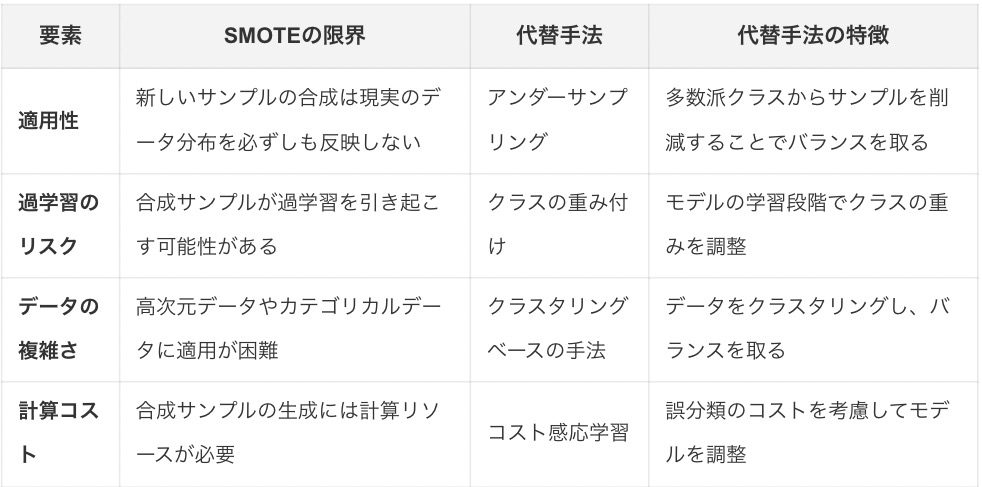

## 代替手法の選択基準
    ・データセットのサイズと特性: 大規模なデータセットや特定の特性を持つデータセットには、計算効率やデータの特性に応じた手法を選択する必要があります。
    ・モデルの目的: モデルの目的や重視する評価指標に基づいて、最適な手法を選択します。
    ・実装の複雑さ: 一部の手法は実装が複雑であり、その複雑さを考慮して選択を行うことが重要です。
    
    SMOTEとこれらの代替手法を適切に選択・適用することで、データ不均衡問題に効果的に対処することが可能になります。

## 代替手法の解説
### アンダーサンプリング
    アンダーサンプリングは、多数派クラスのサンプル数を減らすことでデータセットのバランスを取る手法です。このアプローチでは、多数派クラスからランダムにサンプルを削除するか、より洗練された方法で多数派クラスのサンプルを選択的に削除します。

    長所: 計算効率が良く、高次元データにも適用しやすい。
    短所: 有用な情報を失うリスクがあり、データセットの全体像を反映しない可能性がある。

### クラスの重み付け
    クラスの重み付けでは、学習アルゴリズム内でクラスの重要性に応じた重みを設定します。
    多数派クラスのサンプルには低い重みを、少数派クラスのサンプルには高い重みを与えることで、モデルの学習過程で少数派クラスの重要性を強調します。

    長所: データを削除せずにバランスを取ることができ、全ての情報を保持できる。
    短所: 適切な重みを設定するのが難しい場合があり、モデルの複雑性が増す。

### クラスタリングベースの手法
    クラスタリングベースの手法では、データをクラスタに分割し、各クラスタ内でデータのバランスを取ります。この方法では、データの自然な構造やグループを考慮して再サンプリングを行います。

    長所: データの分布を考慮したバランスの取り方ができる。
    短所: クラスタリングアルゴリズムの選択やパラメータ設定が重要であり、実装が複雑になる場合がある。

### コスト感応学習
    コスト感応学習では、異なる種類の誤分類に異なるコストを割り当てます。この方法では、少数派クラスの誤分類に高いコストを割り当てることで、モデルがこれらのサンプルの分類を重視するようにします。

    長所: モデルのトレーニングに直接影響を与え、少数派クラスの重要性を強調できる。
    短所: 正確なコスト設定が難しく、不適切な設定はモデルの性能に悪影響を及ぼす可能性がある。

    これらの代替手法を適切に選択・適用することで、データ不均衡問題に対して多角的に対処することが可能になります。

## まとめ
    今回は、SMOTEとは何なのかという説明と、PythonのSMOTEライブラリである imbalanced-learn を使い、標準的なSMOTEの一般的な使い方について説明しました。

    データの不均衡は挑戦的な問題ですが、SMOTEを適切に活用することで、これらの課題を克服し、データ駆動型の意思決定をサポートすることが可能です。

    このSMOTEにも幾つか問題と限界があります。

    その限界を突破するために開発された、SMOTEのバリエーションなどについて簡単に紹介しました。

    次回以降、ケーススタディを通し、SMOTEの幾つかのバリエーションを含めた使い方について説明します。